# Анализ оттока клиентов банка "Метанпром"

##  Цель:

Проанализировать клиентов банка и выделить сегменты клиентов, которые склонны уходить из банка. Дать рекомндации по их удержанию.

##  Задачи проекта:

### Загрузка и описание данных

###  Подготовка данных

####  кодирование (для использования в анализе корреляции)

 - выполнить анализ методами Пирсона или Спирмена  
 - определить технику кодирования в зависимости от признака (упорядоченный или неупорядоченный)
 - кодирование не применяется при использование метода `phik`

####  Классификация пропусков  (анализ природы пропусков и их разумная обработка)

- для каждого признака с пропусками сделать отдельный технический признак со значениеми 1 или 0  
- с помощью матрицы корреляции проанализировать связь с другими признаками таблицы и определить имеется ли связь между пропусками или нет  
- исходя из полученных результатов принять решение что делать с пропусками

####  выполнить анализ неявных дубликатов по user_id

###  Exploratory Data Analysis (EDA) - разведочный анализ данных

####  анализ распределения признаков в разрезе оттока

 - для непрерывных величин - ищем отточные интервалы, для категориальных/дискретных - ищем значения признака с оттоком выше, чем по банку
 - построить распределение признака в разрезе оттока с помощью нормированной гистограммы (для возраста строим норм.гистограмму в разрезре оттока, далее делаем срез по таблице - получаем сегмент)

####  анализ портретов клиентов в разрезе оттока (описание мер центральных тенденций характеризующих типичные значение)

 - построим сводную таблицу  (значения признака оттока - столбцы), в каждом столбце определяем меру центральной тенденции (для непрерывных признаков - ср.знач, для дискретных - медиану, для категориальных - моду; далее строим 3 столбец с относительной разницей для непрерывных призаков.

####  корреляционный анализ признака churn с другими признаками (в тч интерпретация по Чеддоку)

- построим полную матрицу корреляции всех признаков со всеми признаками
- визуализируем столбец Churn из этой матрицы и интерпретируем каждый признак по шкале Чеддока

###  Проверка статистических гипотез

 - минимум две гипотезы
 - выполним обоснование инструмента
 - все гипотезы должны быть связаны с оттоком

###  Подведение промежуточных итогов

 - выводы по результатам EDA, корреляционного анализа и гипотез, выделение признаков, влияющих на оттток
 - общий краткий вывод
 - установить признаки, их значения и интервал для распрделения на сегменты

###  Сегментация

 - от 500 клиентов на сегмент, не менее трёх
 - отток выше, чем средний уровень оттока по банку
 - сегменты должны быть неоднородными, для каждого сегмента не менее двух признаков, и признаки не должны пересекаться для разных сегментов

###  Приоритизация сегментов

 - определить приоритеты сегментов (первый приоритет - самые большие по количеству и величине оттока)

###  Формирование рекомендаций

 - выдать рекомендации на каждый сегмент индивидуально
 - рекомендации должны соответствовать сегменту, то есть быть таргетированными

## Выполнение проекта

### Загрузка и описание данных

Загрузим необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import itertools
from statsmodels.stats.proportion import proportions_ztest
import os

Загрузим данные

In [2]:
data = pd.read_csv('/datasets/bank_scrooge.csv')

In [3]:
path1 = '/datasets/bank_scrooge.csv'
path2 = 'https://code.s3.yandex.net/datasets/bank_scrooge.csv'

if os.path.exists(path1):
    data = pd.read_csv(path1)
elif os.path.exists(pth2):
    data = pd.read_csv(path2)
else:
    print('Error')

Выполним обзор данных

In [4]:
data.head(10)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [6]:
data.describe().round(2)

,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00,10000.00,9974.00,10000.00,7.705000e+03,10000.00,10000.00,10000.00,10000.00,10000.00
mean,171814.71,848.70,42.73,2.63,8.277943e+05,1.87,0.68,0.52,147866.89,0.18
std,33708.24,65.45,12.18,1.98,1.980614e+06,0.79,0.47,0.50,139388.51,0.39
min,94561.00,642.00,18.00,0.00,0.000000e+00,0.00,0.00,0.00,2546.30,0.00
25%,142810.25,802.00,33.00,0.00,2.955542e+05,1.00,0.00,0.00,75251.90,0.00
50%,172728.00,853.00,40.00,3.00,5.242722e+05,2.00,1.00,1.00,119658.10,0.00
75%,201261.75,900.00,51.00,4.00,9.807058e+05,2.00,1.00,1.00,174500.54,0.00
max,229145.00,1000.00,86.00,9.00,1.191136e+08,5.00,1.00,1.00,1395064.45,1.00


Определим количетсов пропусков

In [7]:
data.isnull().sum()

USERID              0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
EST_SALARY          0
churn               0
dtype: int64

Доля пропусков в столбце `balance`

In [8]:
data['balance'].isnull().mean().round(2)

0.23

Доля пропусков в столбце `age`

In [9]:
data['age'].isnull().mean()

0.0026

Проверим наличие полных дубликатов

In [10]:
data.duplicated().sum()

0

In [11]:
data['USERID'].duplicated().sum()

73

**Выводы**  
- в датасете 10000 строк, 10 столбцов с данными  
- необходимо привести регистр названий столбцов к нижнему
- в колонке `balance` 23% пропусков. Данные пропуски, вероятно, возникли не случайно, необходимо провести анализ и принять решение по пропускам
- в колонке `age` 26 пропусков. Предположительно данные пропуски возникли случайно.
- необходимо привести тип данных в столбце `age` к типу `int`
- полных дубликатов не обнаружено
- обнаружено 73 дубликата в столбце `USERID`, необходим дополнительный анализ неявных дубликатов
- также имеются клиенты с нулевым количеством продуктов
- доля оттока по банку состоявлет 18% пользователей

### Подготовка данных

Приведем наименования столбцов к корректному виду

In [12]:
data = data.rename (columns = {'USERID':'user_id', 'EST_SALARY':'est_salary'})
data.head(2)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0


В ходе обзора данных было обнаружено, что имеются клиенты с нулевым количеством продуктов.

In [13]:
data.query('products==0')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,147837,962.0,Рыбинск,Ж,79.0,3,NaN,0,0,0,25063.96,1


Найден всего, один пользователь, следовательно можно сделать вывод, что это ошибка связанная с человеческим фактором. Заменим количество продуктов, на 1, чтобы не удалять данную строчку.

In [14]:
data.loc[data['products'] == 0, 'products'] = 1

In [15]:
data['products'].describe()

count    10000.000000
mean         1.870200
std          0.792474
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          5.000000
Name: products, dtype: float64

#### Выполним кодирование неупорядоченных категориальных переменных - столбцы `city`, `gender`. Для того, чтобы применять среднее и смотреть корреляции какого-то числового показателя с категориальным неупорядоченными в дальнейших расчетах

Создадим копии столбцов `city`, `age`

In [16]:
data['city_'] = data['city']
data['gender_'] = data['gender']
data.head(2)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_,gender_
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,Рыбинск,Ж
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,Рыбинск,Ж


Выполним кодирование в новых столбцах

In [17]:
data = pd.get_dummies(data, columns = ['city_', 'gender_'])

In [18]:
data = data.rename (columns = ({'city__Ростов':'Rostov', 'city__Рыбинск':'Rybinsk',
                                'city__Ярославль':'Yaroslavl', 
                                'gender__Ж':'female', 'gender__М':'male'}))

In [19]:
data.head(2)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Rostov,Rybinsk,Yaroslavl,female,male
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0


#### Создадим столбецы с признаком (1 или 0) в зависимости от наличия пропусков в столбецах `balance` и `age`

In [20]:
data['balance_null'] = data['balance']
data['balance_null'] = np.where(data['balance'].isna(), 1, 0)

In [21]:
data['age_null'] = data['age']
data['age_null'] = np.where(data['age'].isna(), 1, 0)

In [22]:
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Rostov,Rybinsk,Yaroslavl,female,male,balance_null,age_null
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0,0,0
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0,0,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,0,1,0,1,0,1,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0,0,0
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,0,0,1,0,1,0,0


Посчитаем корреляцию `balance_null` и `age_null` с другими имеющимися признаками

In [23]:
data.drop('user_id',axis=1).corrwith(data['balance_null']).sort_values(ascending=True).round(2)

equity          -0.71
products        -0.49
churn           -0.25
female          -0.06
Rostov          -0.06
age             -0.03
Rybinsk         -0.01
last_activity    0.03
age_null         0.05
Yaroslavl        0.06
male             0.06
score            0.14
credit_card      0.16
est_salary       0.31
balance_null     1.00
balance           NaN
dtype: float64

In [24]:
data.drop('user_id',axis=1).corrwith(data['age_null']).sort_values(ascending=True).round(2)

products        -0.03
equity          -0.03
churn           -0.02
Rostov          -0.02
Yaroslavl       -0.01
female          -0.00
male             0.00
score            0.01
balance          0.01
credit_card      0.01
est_salary       0.01
Rybinsk          0.02
last_activity    0.03
balance_null     0.05
age_null         1.00
age               NaN
dtype: float64

Шкала Чеддока используется для оценки силы связи в теории корреляции  

Градации шкалы: (отрицательные значения - обратная связь)
* слабая — от 0,1 до 0,3; 
* умеренная — от 0,3 до 0,5; 
* заметная — от 0,5 до 0,7; 
* высокая — от 0,7 до 0,9; 
* весьма высокая (сильная) — от 0,9 до 1,0.

Имеются множественные зависимости прямой и обратной связи показаний баланса с другими признаками, то есть мы не можем по какому-то конкретно признаку заполнить пропуски в столбце `balance`.  

Следовательно пропуски в столбце `balance` относятся к категории *MNAR (Missing Not At Random / Отсутствует не случайно)*

Для возраста `age` связь отсутсвует с другими признаками. В виду малого количества пропусков, заполним их медианным значением и изменим тип данных на `int`.  

Пропуски в столбце `age` относятся к категории *MCAR (Missing Completely At Random / Отсутствует совершенно случайно)*

In [25]:
data['age'] = data['age'].fillna(data['age'].median())

In [26]:
data['age'].isna().sum()

0

In [27]:
data['age'] = data['age'].astype('int')

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            10000 non-null  int64  
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  int64  
 12  Rostov         10000 non-null  uint8  
 13  Rybinsk        10000 non-null  uint8  
 14  Yaroslavl      10000 non-null  uint8  
 15  female         10000 non-null  uint8  
 16  male           10000 non-null  uint8  
 17  balance_null   10000 non-null  int64  
 18  age_nul

#### Рассмотрим неявные дубликаты в данных

Всего выявлено 73 дубликата по `user_id`. Чтобы определить разные это пользователи или одни и теже проверим дубликаты по айди,возрасту,полу и городу в различных сочетаниях (`user_id`,`age`,`gender`,`city`)

In [29]:
data.duplicated(['user_id', 'age','gender','city']).sum()

0

In [30]:
data.duplicated(['user_id', 'age','city']).sum()

0

In [31]:
data.duplicated(['user_id','gender','city']).sum()

0

In [32]:
data.duplicated(['user_id', 'age','gender']).sum()

3

In [33]:
data[data.duplicated(['user_id','gender', 'age'], keep = False)]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Rostov,Rybinsk,Yaroslavl,female,male,balance_null,age_null
3274,155765,863.0,Ярославль,М,30,5,1036114.50,5,1,1,150744.50,1,0,0,1,0,1,0,0
3668,185829,925.0,Рыбинск,М,40,0,NaN,1,1,0,228305.64,0,0,1,0,0,1,1,0
5197,155765,923.0,Рыбинск,М,30,0,NaN,1,1,1,120296.60,0,0,1,0,0,1,1,0
8205,227795,840.0,Рыбинск,М,34,2,350768.03,1,1,0,102036.14,1,0,1,0,0,1,0,0
8497,227795,839.0,Ярославль,М,34,2,326593.14,2,1,0,103314.92,0,0,0,1,0,1,0,0
9632,185829,927.0,Ярославль,М,40,0,NaN,1,1,0,231254.86,0,0,0,1,0,1,1,1


Как можно увидеть из полученных результатов, пользователи с дублирующимся айди, полом и возрастом, это клиенты с одним айди в разных городах. Это либо ошибка выгрузки или синхронизации общией базы банка по всем филиалам. Как следствие, данные неявные дубликаты отбрасывать нельзя

Проверим отсутсвие ошибок в столбцах с категориальными и логическими (0,1) значениями

In [34]:
data['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

In [35]:
data['gender'].unique()

array(['Ж', 'М'], dtype=object)

In [36]:
data['credit_card'].unique()

array([0, 1])

In [37]:
data['last_activity'].unique()

array([1, 0])

In [38]:
data['churn'].unique()

array([1, 0])

В результате анализа неявных дубликатов, последние не были обнаружены. Удалим столбец `user_id`, так как для дальнейшего анализа он не нужен, чтобы не утяжелять выводимые таблицы и графики.

In [39]:
data = data.drop('user_id', axis=1)

In [40]:
data.head(1)

,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Rostov,Rybinsk,Yaroslavl,female,male,balance_null,age_null
0,850.0,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0,0,0


**Выводы**  
- были откорректированы названия столбцов
- в строке с нулевым количеством продуктов установили количество продуктов в значении 1
- был выполнен корреляционный анализ столбцов с пропусками `age`, `balance`. В ходе которого было выявлены множественные связи для столбца `balance` и отсутсвие связей с другими признаками для столбца `age`. На основе полученных данных было принято решение о замене пропусков медианным значением в столбце `age` и изменен тип данных в этом столбце на `int`. А для столбца `balance` оставить пропуски без изменений
- было выполнено кодирование неупорядоченных категориальных столбцов  `gender`, `city` для выполнения дальнейшего анализа
- неявные дубликаты не обнаружены, то есть все повторяющиеся значения `user_id` это разные люди
- после анализа неявных дубликатов был удален столбец `user_id` (по рекоммендации ментора)

### Разведочный анализ данных

#### Анализ распределения признаков в разрезе оттока

Построим распределения признаков в разрезе оттока   
(для непрерывных величин - ищем отточные интервалы, для категориальных/дискретных - ищем значения признака с оттоком выше, чем по банку)

In [41]:
sns.set_style("whitegrid", {"grid.color":"0.5", "grid.linestyle":":"})
sns.set_palette('dark')

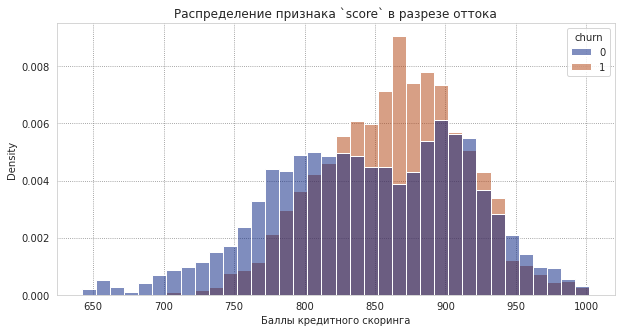

In [42]:
plt.figure(figsize=(10,5))
sns.histplot(data= data, x=data['score'], hue=data['churn'], binwidth=10, stat='density', common_norm=False);
plt.title('Распределение признака `score` в разрезе оттока')
plt.xlabel('Баллы кредитного скоринга')
plt.show()

Диапазон превышения численности отточных клиентов 810-940 баллов кредитного скоринга

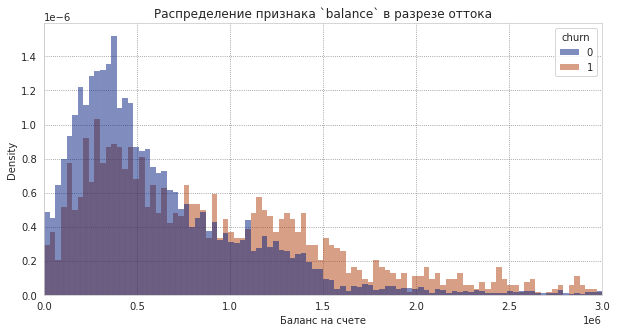

In [43]:
plt.figure(figsize=(10,5))
sns.histplot(data= data, x=data['balance'], hue=data['churn'],binwidth=30000, stat='density', common_norm=False);
plt.title('Распределение признака `balance` в разрезе оттока')
plt.xlabel('Баланс на счете')
plt.xlim(right=3e6, left=0)
plt.show()

Диапазон превышения численности отточных клиентов начинается от 750 тыс рублей на балансе и усиливатся при балансе от 1млн рублей

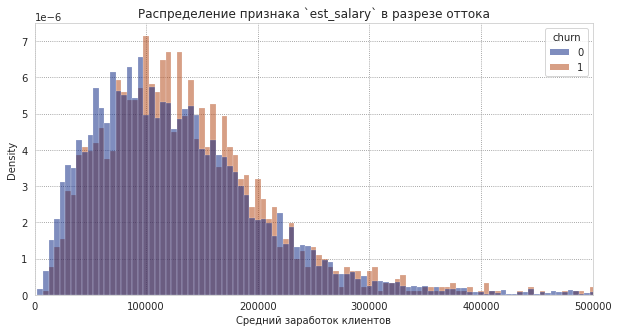

In [44]:
plt.figure(figsize=(10,5))
sns.histplot(data= data, x=data['est_salary'], hue=data['churn'],binwidth=5000, stat='density', common_norm=False);
plt.title('Распределение признака `est_salary` в разрезе оттока')
plt.xlabel('Средний заработок клиентов')
plt.xlim(right=5e5, left=0)
plt.show()

Диапазон превышения численности отточных клиентов: 100-240 тыс рублей доход клиентов

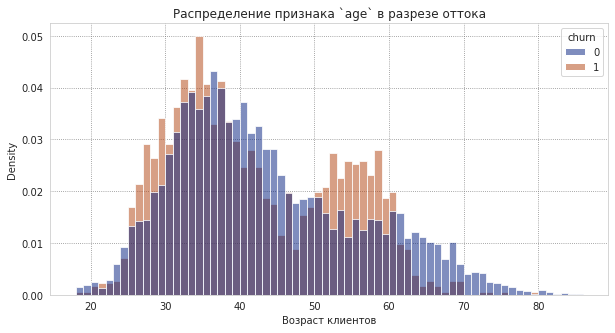

In [45]:
plt.figure(figsize=(10,5))
sns.histplot(data= data, x=data['age'], hue=data['churn'],binwidth=1, stat='density', common_norm=False);
plt.title('Распределение признака `age` в разрезе оттока')
plt.xlabel('Возраст клиентов')
plt.show()

Диапазон превышения численности отточных клиентов:  26-36 лет и 51-61 лет

Доля отточных клиентов по всему банку

In [46]:
churn_mean = data['churn'].mean()
churn_mean

0.182

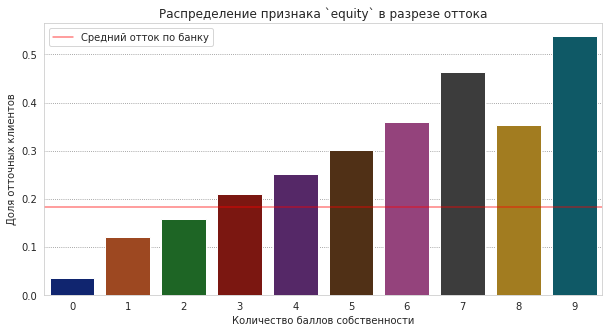

In [47]:
plt.figure(figsize=(10,5))
plt.axhline(y=churn_mean, color='red', alpha=0.5)
plt.legend(["Средний отток по банку"])
sns.barplot(data=data, x=data['equity'], y=data['churn'], ci=None)
plt.title('Распределение признака `equity` в разрезе оттока')
plt.xlabel('Количество баллов собственности')
plt.ylabel('Доля отточных клиентов')
plt.show()

Доля отточных клиентов превышает среднее значение оттока по банку при баллах собственности больше 3

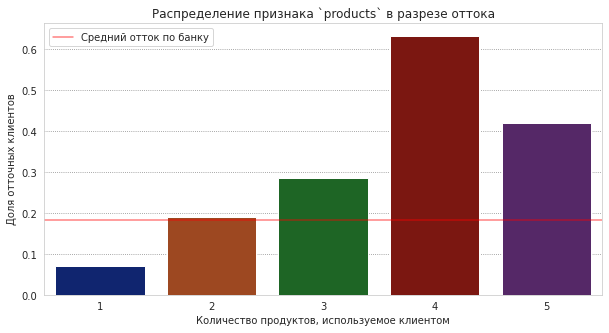

In [48]:
plt.figure(figsize=(10,5))
plt.axhline(y=churn_mean, color='red', alpha=0.5)
plt.legend(["Средний отток по банку"])
sns.barplot(data=data, x=data['products'], y=data['churn'], ci=None)
plt.title('Распределение признака `products` в разрезе оттока')
plt.xlabel('Количество продуктов, используемое клиентом')
plt.ylabel('Доля отточных клиентов')
plt.show()

Доля отточных клиентов превышает среднее значение оттока по банку при количестве продуктов больше 3

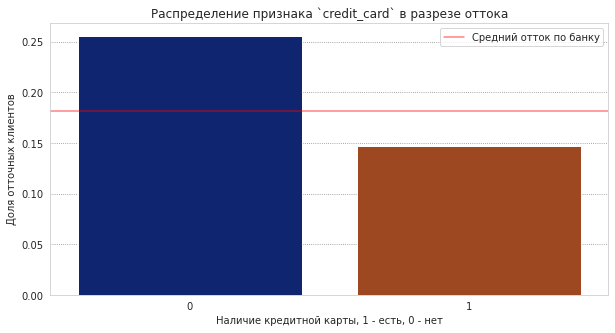

In [49]:
plt.figure(figsize=(10,5))
plt.axhline(y=churn_mean, color='red', alpha=0.5)
plt.legend(["Средний отток по банку"])
sns.barplot(data=data, x=data['credit_card'], y=data['churn'], ci=None)
plt.title('Распределение признака `credit_card` в разрезе оттока')
plt.xlabel('Наличие кредитной карты, 1 - есть, 0 - нет')
plt.ylabel('Доля отточных клиентов')
plt.show()

Доля отточных клиентов превышает среднее значение оттока по банку если у клиента нет кредитной карты

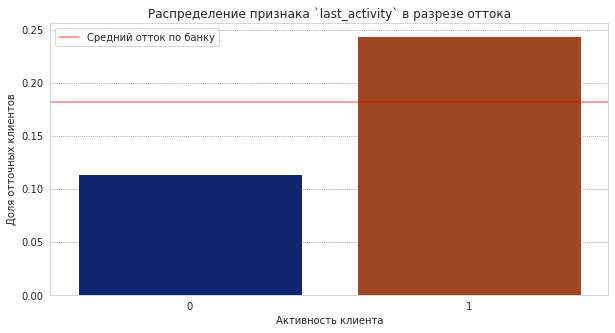

In [50]:
plt.figure(figsize=(10,5))
plt.axhline(y=churn_mean, color='red', alpha=0.5)
plt.legend(["Средний отток по банку"])
sns.barplot(data=data, x=data['last_activity'], y=data['churn'], ci=None)
plt.title('Распределение признака `last_activity` в разрезе оттока')
plt.xlabel('Активность клиента')
plt.ylabel('Доля отточных клиентов')
plt.show()

Доля отточных клиентов превышает среднее значение оттока по банку при условии что клиент активный (то есть использует продукты банка)

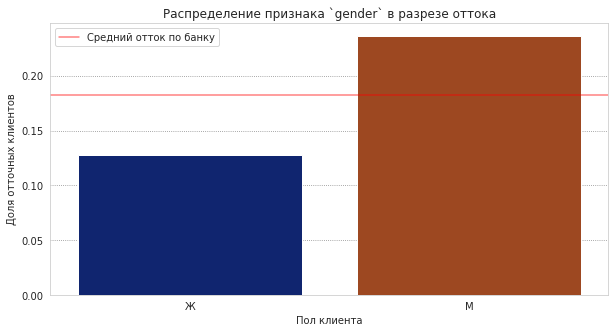

In [51]:
plt.figure(figsize=(10,5))
plt.axhline(y=churn_mean, color='red', alpha=0.5)
plt.legend(["Средний отток по банку"])
sns.barplot(data=data, x=data['gender'], y=data['churn'], ci=None)
plt.title('Распределение признака `gender` в разрезе оттока')
plt.xlabel('Пол клиента')
plt.ylabel('Доля отточных клиентов')
plt.show()

Доля отточных клиентов превышает среднее значение оттока по банку если это клиенты мужского пола

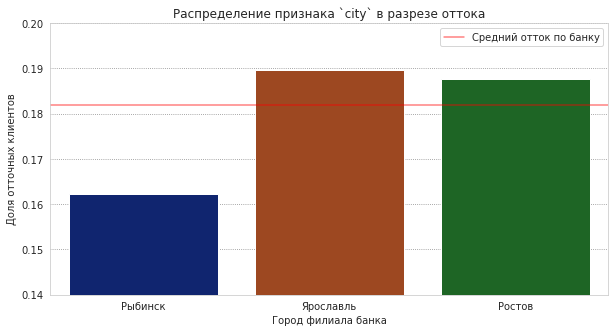

In [52]:
plt.figure(figsize=(10,5))
plt.axhline(y=churn_mean, color='red', alpha=0.5)
plt.legend(["Средний отток по банку"])
sns.barplot(data=data, x=data['city'], y=data['churn'],ci=None)
plt.title('Распределение признака `city` в разрезе оттока')
plt.xlabel('Город филиала банка')
plt.ylabel('Доля отточных клиентов')
plt.ylim((0.14,0.2))
plt.show()

Доля отточных клиентов превышает среднее значение оттока по банку если клиенты из Ярославля или Ростова

#### Анализ портретов клиентов в разрезе оттока

Рассмотрим центральные тенденции признаков в разрезе оттока.

Для непрерывных переменных - среднее значение, при наличии выбросов - дополнительно медиану.  
Для дискретных признаков - медиана.  
Для категориальных переменных - мода.

In [53]:
data_churn = data.groupby(['churn']).agg({'balance': ['median','mean'],
                                        'est_salary': ['median','mean'],
                                        'score' : 'mean', 
                                        'age': 'mean',
                                        'equity': 'median',
                                        'products': 'median',
                                        'credit_card':'median' ,
                                        'last_activity':'median' ,
                                        'city': lambda x:st.mode(x,keepdims=False)[0],
                                        'gender': lambda x:st.mode(x,keepdims=False)[0]
                                        }).round(2)
data_churn = data_churn.rename(columns = {'<lambda>':'mode'})
data_churn

/opt/conda/lib/python3.9/site-packages/scipy/stats/_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
/tmp/ipykernel_239/3766140187.py:9: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  'city': lambda x:st.mode(x,keepdims=False)[0],
/tmp/ipykernel_239/3766140187.py:10: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  'gender': lambda x:st.mode(x,keepdims=False)[0]


balance             est_salary              score    age equity  \
          median        mean     median       mean    mean   mean median   
churn                                                                      
0      475382.44   733982.59  118257.72  147783.20  845.43  43.01      3   
1      782410.47  1133993.27  125390.62  148243.01  863.40  41.45      4   

      products credit_card last_activity       city gender  
        median      median        median       mode   mode  
churn                                                       
0            2           1             0  Ярославль      Ж  
1            2           1             1  Ярославль      М

In [54]:
pd.concat({'Не отток': data_churn.iloc[0],
           'Отток': data_churn.iloc[1],
           'Относит.разница, %': (data_churn.loc[1,['balance','est_salary','score','age']]/
                                       data_churn.loc[0,['balance','est_salary','score','age']]-1)*100},axis=1,sort=False)

Не отток       Отток Относит.разница, %
age           mean        43.01       41.45          -3.627063
balance       mean    733982.59  1133993.27          54.498661
              median  475382.44   782410.47           64.58548
city          mode    Ярославль   Ярославль                NaN
credit_card   median          1           1                NaN
equity        median          3           4                NaN
est_salary    mean     147783.2   148243.01           0.311138
              median  118257.72   125390.62           6.031657
gender        mode            Ж           М                NaN
last_activity median          0           1                NaN
products      median          2           2                NaN
score         mean       845.43       863.4           2.125546

**Портрет отточного клиента:**
 - средний возраст *41.5 лет*
 - ср.баланс: *1.134 млн руб*
 - медианный баланс: *782.4 тыс руб*
 - город: *Ярославль*
 - кредитная карта: *есть (1)*
 - количество баллов собственности: *4*
 - средний доход: *148.2 тыс руб*
 - медианный доход: *125.4 тыс руб*
 - пол: *мужской*
 - активный клиент: *нет*
 - количество продуктов банка: *2*
 - средний балл скоринга: *863.4*

**Портрет лояльного клиента:**
 - средний возраст: *43 года*
 - ср.баланс: *733.9 тыс рублей*
 - медианный баланс: *475.4 тыс руб*
 - город: *Ярославль*
 - кредитная карта: *есть (1)*
 - количество баллов собственности: *3*
 - средний доход: *147.7 тыс руб*
 - медианный доход: *118 тыс руб*
 - пол: *женский*
 - активный клиент: *да*
 - количество продуктов банка: *2*
 - средний балл скоринга: *845.43*

**Выводы**  
 - разница в возрасте между отточными и неотточными клиентами ~1.5 года
 - сильные различия по количеству средств на счете: у отточных клиентов в среднем  более чем на 50% на балансе средств больше, возможно это связано с тем, что пользователе меньше используют продукты банка и как следствие больше денег "лежат без дела"  
 - имеется различие по количеству очков собственности, вероятно не является определяющим фактором
 - также в числе отточных клиентов части оказываются клиенты мужского пола
 - по остальным показателям различия незначительны

#### Выполним корреляционный анализ признака churn с другими признаками

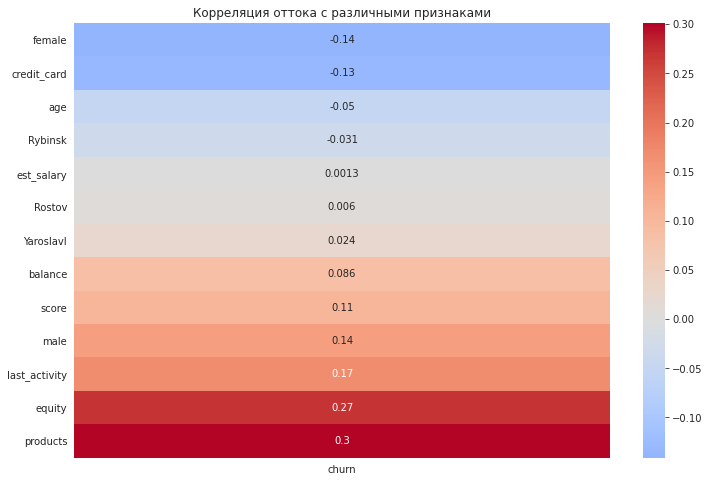

In [55]:
corr = data[['churn',
                  'age',
                  'credit_card',
                  'last_activity',
                  'equity',
                  'products',
                  'balance',
                  'est_salary',
                  'score',
                  'Rostov',
                  'Rybinsk',
                  'Yaroslavl',
                  'female',
                  'male'
                 ]].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr.loc[:, ['churn']].drop('churn').sort_values('churn'), annot=True,cmap='coolwarm', center=0);
plt.title('Корреляция оттока с различными признаками')
plt.show()

Шкала Чеддока используется для оценки силы связи в теории корреляции  

Градации шкалы: (отрицательные значения - обратная связь)
* слабая — от 0,1 до 0,3; 
* умеренная — от 0,3 до 0,5; 
* заметная — от 0,5 до 0,7; 
* высокая — от 0,7 до 0,9; 
* весьма высокая (сильная) — от 0,9 до 1,0.

Наблюдается слабая прямая корреляция оттока со следующими признаками (то есть при увеличении значения признака, значение оттока увеличивается): 
- баллы кредитного скоринга, 
- с показателем опреледеляющим принадлежность к мужскому полу, 
- параметром активности клиента, 
- количеством баллов собственности и количеством продуктов, причем последние 2 показателя на границе с умеренной зоной корреляции, то есть имеют наибольшую из всех имеюищхся
- значения баланса на счету клиента (корреляция 

Также наблюдается слабая обратная корреляция оттока с признаками (то есть при росте значения признака отточность снижается и наоборот):
- наличие пропуска в графе баланс в данных
- показателем опреледеляющим принадлежность к женскому полу
- наличие кредитной карты  

Не влияет на показатель оттока:
- город
- возраст
- доход

**Вывод:**  
1. Анализ отточности  
 Преобладающие признаки отточных клиентов:  
  * балл кредитного скоринга: 810-940  
  * баланс: от 750 тыс рублей с усилением от 1млн рублей  
  * доход клиента: от 100тыс до 240тыс рублей  
  * возраст клиента: 26-36 лет и 51-61 год  
  * баллы собсвтеноости: больше 3  
  * количество продуктов: больше 3  
  * пол: мужской
  * отсутствие кредитной карты  
  * город: Ярославль, Ростов
  * клиент активен  
    
2. Анализ портретов отточных и неотточных клиентов  
  - разница в возрасте между отточными и неотточными клиентами ~1.5 года
  - сильные различия по количеству средств на счете: у отточных клиентов в среднем  более чем на 50% на балансе средств больше, возможно это связано с тем, что пользователе меньше используют продукты банка и как следствие больше денег "лежат без дела"  
  - имеется различие по количеству очков собственности, вероятно не является определяющим фактором
  - также в числе отточных клиентов части оказываются клиенты мужского пола
  - по остальным показателям различия незначительны  
  
3. Корреляция признаков  

    Наблюдается слабая прямая корреляция оттока со следующими признаками (то есть при увеличении значения признака, значение оттока увеличивается): 
- баллы кредитного скоринга, 
- с показателем опреледеляющим принадлежность к мужскому полу, 
- параметром активности клиента, 
- количеством баллов собственности и количеством продуктов, причем последние 2 показателя на границе с умеренной зоной корреляции, то есть имеют наибольшую из всех имеюищхся
- значения баланса на счету клиента (корреляция 

    Также наблюдается слабая обратная корреляция оттока с признаками (то есть при росте значения признака отточность снижается и наоборот):
- наличие пропуска в графе баланс в данных
- показателем опреледеляющим принадлежность к женскому полу
- наличие кредитной карты  

    Не влияет на показатель оттока:
- город
- возраст
- доход

### Проверка гипотез

Гипотеза №1  
О различии доходов между отточными и неотточными клиентами

Н0: доход отточных и неотточных клиентов одинаковый  
Н1: доход отточных и неотточных клиентов различен

Для применения t-теста необходимо проверить:  
- независимость выборок
- нормальность распределения  
- равенство дисперский
- отсутсвие выбросов, которые влияют на среднее

Две выборки для проверки данной гипотезы a - неотточные, b - отточные клиенты

In [56]:
a = data[data['churn'] == 0]['est_salary']
b = data[data['churn'] == 1]['est_salary']

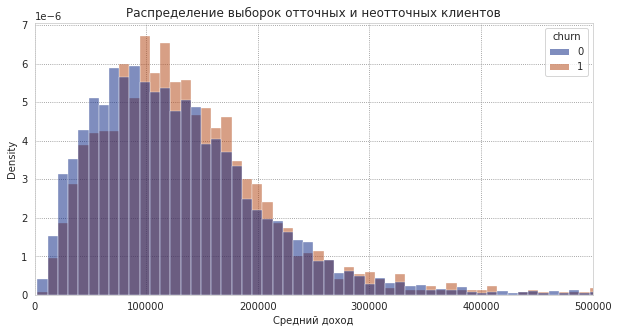

In [57]:
plt.figure(figsize=(10,5))
sns.histplot(data= data, x=data['est_salary'], hue=data['churn'],stat='density', common_norm=False);
plt.title('Распределение выборок отточных и неотточных клиентов')
plt.xlabel('Средний доход')
plt.xlim(right=5e5, left=0)
plt.show()

Рассматриваемые выборки достаточно крупны и независимы друг от друга

Проверим соответствие выборок нормальному распределению при помощи критерия Шапиро-Уилка

Н0: выборка распределена нормально  
Н1: выборка имеет ненормальное распределение

Примем уровень статистической значимости равным 0.05

In [58]:
alpha = 0.05  
result = st.shapiro(a)
print(result)
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, распределение ненормальное')
else:
    print('Оттвергнуть нулевую гипотезу нельзя, распределение нормальное')  

ShapiroResult(statistic=0.6149210929870605, pvalue=0.0)
Отвергаем нулевую гипотезу, распределение ненормальное


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Н0: выборка распределена нормально  
Н1: выборка имеет ненормальное распределение

In [59]:
alpha = 0.05  
result = st.shapiro(b)
print(result)
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, распределение ненормальное')
else:
    print('Оттвергнуть нулевую гипотезу нельзя, распределение нормальное')

ShapiroResult(statistic=0.6442221999168396, pvalue=0.0)
Отвергаем нулевую гипотезу, распределение ненормальное


Выполним оценку статистической значимости равенства дисперсий. Для этого применим тест Левене

Н0: дисперсии выборок равны   
Н1: дисперсии выборок неравны

In [60]:
alpha = 0.05  
results = st.levene(a, b)
print('p-value: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу')

p-value:  0.009520715759133944
Отвергаем нулевую гипотезу


В результате проведения теста Левене отвергли нулевую гипотезу, следовательно дисперсии выборок неравные

Различия среднего дохода отточных и неотточных клиентов (менее 0.5%) и медианного дохода (около 6.3%), что может свидетельствовать о наличии выбросов, которые влияют на определение среднего дохода.

По полученным результатам можно сделать вывод, что применение ttest при данных условиях некорректно, в связи с этим применим utest Манна-Уитни.  
В случае невозможности применения ttest при сопоставлении двух выборок с целью выявления различий между ними по уровню одного исследуемого признака, то чаще всего используются два непараметрических критерия - критерием Розенбаума и критерием Манна – Уитни. Для независимых выборок применяется utest Манна-Уитни (также при невозможности применения ttest в виду невыполнения условий, советуют применять utest Манна-Уитни, про него также упоминалось в процессе обучения)

In [61]:
alpha = 0.05  
results = st.mannwhitneyu(a, b)
print('p-value: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу')

p-value:  0.000243559272811695
Отвергаем нулевую гипотезу


**Вывод:**  
доход отточных и неотточных клиентов различный

Гипотеза №2  
О гендерном различии отточных клиентов

Н0: доля оттока клиентов мужского и женского пола одинаковая  
Н1: доля оттока клиентов мужского и женского пола различная

Две выборки (мужская и женская) в разрезе оттока клиентов

In [62]:
male = data[data['gender']=='М']['churn']
male.unique()

array([1, 0])

In [63]:
female = data[data['gender']=='Ж']['churn']
female.unique()

array([1, 0])

Для проверки гипотез связанных с бинарными признаками используется тест пропорций или z-test,  используемый для оценки того, существенно ли различается доля определенной характеристики между двумя независимыми выборками

In [64]:
# критический уровень статистической значимости
alpha = 0.05

# количество испытаний
trials = [male.count(), female.count()]

# количество успешных
successes = [data[(data['gender']=='М') & (data['churn']==1)]['churn'].count(), data[(data['gender']=='Ж') & (data['churn']==1)]['churn'].count()]

# z-test
z_stat, p_value = proportions_ztest(successes, trials)

print('p-value:', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 3.6080279450456205e-45
Отвергаем нулевую гипотезу


**Вывод:**  
доля оттока клиентов мужского и женского пола различная

### Промежуточный итог

Признаки, которые будут использоваться при сегментации (на основе предыдущих пунктов):  
  * балл кредитного скоринга `score`: 810-940  
  * баланс `balance`: от 750 тыс рублей с усилением от 1млн рублей  
  * доход клиента `est_salary`: от 100тыс до 240тыс рублей  
  * возраст клиента `age`: 26-36 лет и 51-61 год  
  * баллы собственности `equity`: больше 3  
  * количество продуктов `products`: больше 3  
  * отсутствие кредитной карты `credit_card`=0 
  * пол клиента `gender`: мужской (М) 
  * город`city`: Ярославль, Ростов 
  * клиент активен `last_activity`=1 

При проверке гипотез выяснилось, что на отточность влияет пол клиента и значение дохода

Наиболее коррелируемые с оттоком признаки из представленных: `products`, `equity`, `last_activity`  (корреляция слабая)

### Сегментация

В процессе сегментации будет выделено 3 сегмента с показателем отточности больше чем в среднем по банку.   
Каждый сегмент должен содержать не менее 500 клиентов и иметь уникальный набор признаков (из пункта 3.5) по отношению к другим сегментам.

**Сегмент №1**  
Возраст: 26-36 лет  
Активность клиента: да (1)  
Кредитная карта: отсутсвует (0)  

In [65]:
seg_1 = data.query('26<=age<=36 and last_activity==1 and credit_card==0')\
            .agg({'churn':['mean','count']})
seg_1

,churn
mean,0.464552
count,536.000000


Показатель оттока: 0.464 (больше чем в среднем по банку 0.182)  
Количество клиентов: 536 (больше 500)  
Количество отточных клиентов: 249

**Сегмент №2**  
Возраст: 51-61 год  
Баллов собственности: больше или равно 3

In [66]:
seg_2 = data.query('51<=age<=61 and equity>=3').agg({'churn':['mean','count']})
seg_2

,churn
mean,0.354481
count,993.000000


Показатель оттока: 0.354 (больше чем в среднем по банку 0.182)  
Количество клиентов: 993 (больше 500)  
Количество отточных клиентов: 352

**Сегмент №3**  
Доход клиента: от 100 до 240 тыс рублей  
Баланс клиента: более 750 тыс рублей

In [67]:
seg_3 = data.query('100000<=est_salary<=240000 and balance >=750000').agg({'churn':['mean','count']})
seg_3

,churn
mean,0.39663
count,1543.00000


Показатель оттока: 0.397 (больше чем в среднем по банку 0.182)   
Количество клиентов: 1543 (больше 500)  
Количество отточных клиентов: 612

### Приоритезация сегментов

Приоритет сегментам будет присваиваться в зависимости от количества отточных клиентов в сегменте

In [68]:
print('Приоритет (по количеству отточных клиентов):')
print('Сегмент №3', (seg_3['churn']['count'] *seg_3['churn']['mean']).round(3))
print('Сегмент №2', (seg_2['churn']['count'] *seg_2['churn']['mean']).round(3))
print('Сегмент №1', (seg_1['churn']['count'] *seg_1['churn']['mean']).round(3))

Приоритет (по количеству отточных клиентов):
Сегмент №3 612.0
Сегмент №2 352.0
Сегмент №1 249.0


### Выдача рекомендаций

Для сегмента №1 (низкий приоритет) 
Возраст: 26-36 лет  
Активность клиента: да (1)  
Кредитная карта: отсутсвует (0)  
Доля оттока: 0.465  
Количество клиентов: 536  
Количество отточных клиентов: 249

* Предложить кредит на покупку жилья или автомобиля под низкий процент (в рамках рынка)  
* Предложить повышенный кэш бэк при покупке на онлайн маркетплейсах
* Предложить бесплатный кастомный дизаин карты 

Для сегмента № 2  (средний приоритет)
Возраст: 51-61 год  
Баллов собственности: больше или равно 3  
Доля оттока: 0.354  
Количество клиентов: 993  
Количество отточных клиентов: 352

* Предложить большую скидку на страхование имущества
* Предложить скидку у партнерского агрегатора по продаже туристических путевок

Для сегмента № 3  (высший приоритет)
Доход клиента: от 100 до 240 тыс рублей  
Баланс клиента: более 750 тыс рублей  
Доля оттока: 0.397  
Количество клиентов: 1543  
Количество отточных клиентов: 612

* Предложить бонус на проведение первых инвестиций в ценные бумаги на площадке банка или при отсутсвии таковой в ценные бумаги банка
* Предложить повышенную ставку по вкладу

Презентация исследования:  
https://disk.yandex.ru/i/Mm5tnuf82VK0BA